# Lecture 8

## Dependency Parsing

### Dependency Relations
* Each dependency relation consists of a head and a dependent
* Example: "girl likes"
    * The subject (girl) belongs to the verb (likes) so it is dependent
    * Represent the phrase by creating an edge between these two words, for example represent as: "subj(likes[02], girl[01])" to represent the structure 

### Projectivity
* Words in a sentence stand in a linear order
* If dependency edges cross, the dependency structure is non-projective
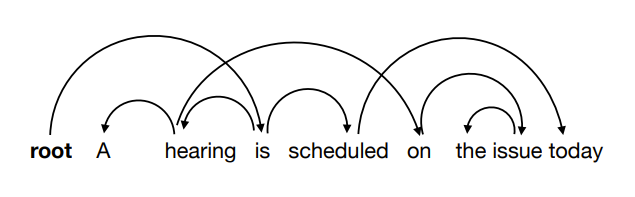
* Non-projective structures appear more frequently in some languages than others (ex. German, Hungarian)
* Some approaches to dependency parsing are incapable of handling non-projectivity

### Dependency Parsing
* Goal: Find a set of labeled, directed dedges between the nodes such that the resulting graph forms a **correct dependency tree**
* Input: 
    * $V_s = \{w_0, w_1, ..., w_m\}$ corresponding to the input sentence $s = w_1, ..., w_m$ (where $w_0$ is the special **root** node)
    * $R = \{PRED, SBJ, OBJ, ATT, ...\}$ inventory of labels
    
    
* What information is useful for dependency parsing?
    * Bi-lexical affinities
        * Financial markets, meeting scheduled
        * Which words are typically associated with one another?
    * Dependency distance
    * Intervening words
        * Had little effect, vs. little had effect
    * Subcategorization/valency of heads

### Subcategorization/Valency
* Verbs may take a different number of arguments of different syntactic types in different positions
    * "The baby slept" vs. "The baby slept to you"
    * "Jenny gave the book to Carl" vs. "Jenny gave the book"
    * "Godzilla destroyed the city" vs. "Godzilla destroyed"

### Dependency Parsing as a Search Problem
* Step 1: Define the space of possible analyses for a sentence
* Step 2: Select the best analysis from this search space
* Framing dependency parsing as a search problem requires defining the search space, search algorithm, and a way to determine the "best" parse

### Approaches to Dependency Parsing
* Grammar-based
* Data-based
    * Dynamic Programming (Eisner 1996)
    * Graph Algorithms (McDonald 2005, MST Parser)
    * **Transition-based** (Nivre 2003, MaltParser)
    * Constraint satisfaction (Karlsson 1990)

### Transition Based Dependency Parsing
* Defines the search space using parser states (configurations) and operations on these states (transitions)
* Start with an initial configuration and find a sequence of transitions to the terminal state
* Use a greedy approach to find the best sequence of transitions, and a discriminative model (classifier) to select the next transition

### Algorithm for Transition-Based Parsing
* A parser state (configuration) is a triple $c = (\sigma, \beta, A)$
    * $\sigma$ is a **stack** of words $w_i \in V_s$
    * $\beta$ is a **buffer** of words $w_i \in V_s$
    * $A$ is a set of dependency arcs $(w_i, r, w_j)$
    
* Start with initial state $c_0$, apply sequence of transitions $t_0, ..., t_{n - 1}$, then return final parse A once the terminal state $c_T$ is reached
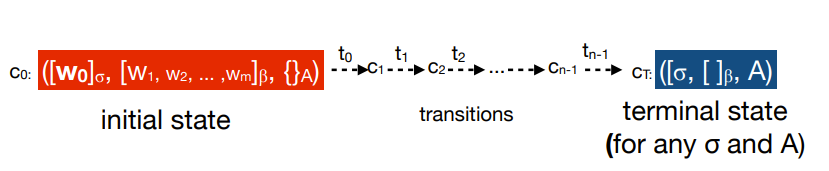

### Transitions ("Arc Standard")
* **Shift:** move the next word from the buffer to the stack

$$
(\sigma, w_i | \beta, A) \Rightarrow (\sigma | w_i, \beta, A)
$$

* **Left-Arc (for relation r):** build an edge from the next word on the buffer to the top word on the stack

$$
(\sigma | w_i, w_j | \beta, A) \Rightarrow (\sigma, w_j | \beta, A \cup \{w_j, r, w_i \}
$$

* **Right-Arc (for relation r):** build an edge from the top word on the stack to the next word on the buffer

$$
(\sigma | w_i, w_j | \beta, A) \Rightarrow (\sigma, w_i | \beta, A \cup \{w_i, r, w_j \}
$$

### Properties of Transition System
* The time require to parse $w_1, ..., w_m$ is $\mathcal{O}(m)$ (specifically $2m$ because the buffer and stack each parse through the words)
* Bottom-up approach: a node must collect all its children before its parent
* Can only produce projective trees (cannot overlap with other dependencies)
* Algorithm is complete (all projective trees over $w_1, ..., w_m$ can be produced by some sequence of transitions)
* Soundness: all terminal structures are projective forests (not necessarily trees)

 ### Deciding the Next Transition
 * Predict the next transition and relation label using a discriminative classifier:
     * Perceptron, log linear model, SVM, Neural Networks
     * Greedy approach
     * If the classifier is $\mathcal{O}(1)$ the runtime for parsing is still $\mathcal{O}(m)$ for m words

### Extracting Features
* Need to define a feature function that maps states to feature vectors
* Each feature consists of:
    1. An address in the state description (identifies a specific word in the configuration, for example the top of the stack)
    2. An attribute of the word in that address (for example POS, word form, lemma, word embedding)
* Train the model on an annotated treebank, construct transition sequences from the dependency trees, and train the model on these transitions

### Constructing Oracle Transitions
* Start with the initial state $([w_0]_{\sigma}, [w_1, w_2, ..., w_m]_{\beta}, {}_A)$
* Then predict the next transition using the annotated dependency tree $A_d$

$$ O(c = (\sigma, \beta, A)) =  
\begin{cases} 
LEFT-ARC_r & \text{if } (\beta[0], r, \sigma[0]) \in A_d \\
RIGHT-ARC_r & \text{if } (\sigma[0], r, \beta[0]) \in A_d \text{ and, for all } \\
 & \text{if} (\beta[0], r', w) \in A_d \text{ then }(\beta[0], r', w) \in A \\
SHIFT_r & \text{otherwise}
\end{cases}
$$